# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План работы  
1. Первчиное знакомство с данными: ознакомление с составом таблицы, количеством пропусков, выявление потенциальных дублей, первые гистограммы  
2. Заполнение пропусков, унификация текстовой информации, удаление пропусков, где это возможно
3. Добавление дополнительных столбцов на основе имеющейся информации для будущих рассчётов 
4. Выявление закономерностей влияния различных параметров на интересующую заказщика переменную  
5. Формулировка вывода по исследованию 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import os



In [2]:

pd.set_option('display.max_columns', 50) 

pth1 = '/datasets/real_estate_data.csv'
pth2 = 'real_estate_data.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')


In [3]:
#чтение файла, первичное знакомство с информацией, выявление уникальных значений

display(data.head(20))
data.info()
display(data['locality_name'].value_counts())
display(data['locality_name'].unique())





,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Санкт-Петербург                               15721
посёлок Мурино                                  522
посёлок Шушары                                  440
Всеволожск                                      398
Пушкин                                          369
                                              ...  
поселок Возрождение                               1
деревня Трубников Бор                             1
посёлок при железнодорожной станции Вещево        1
коттеджный поселок Кивеннапа Север                1
деревня Большая Пустомержа                        1
Name: locality_name, Length: 364, dtype: int64

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [4]:
#подсчёт процента пропущенных данных

display(data.isna().sum())
count_missed_info = data.isna().sum()


display(round(data.isna().sum() / len(data) * 100, 2))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

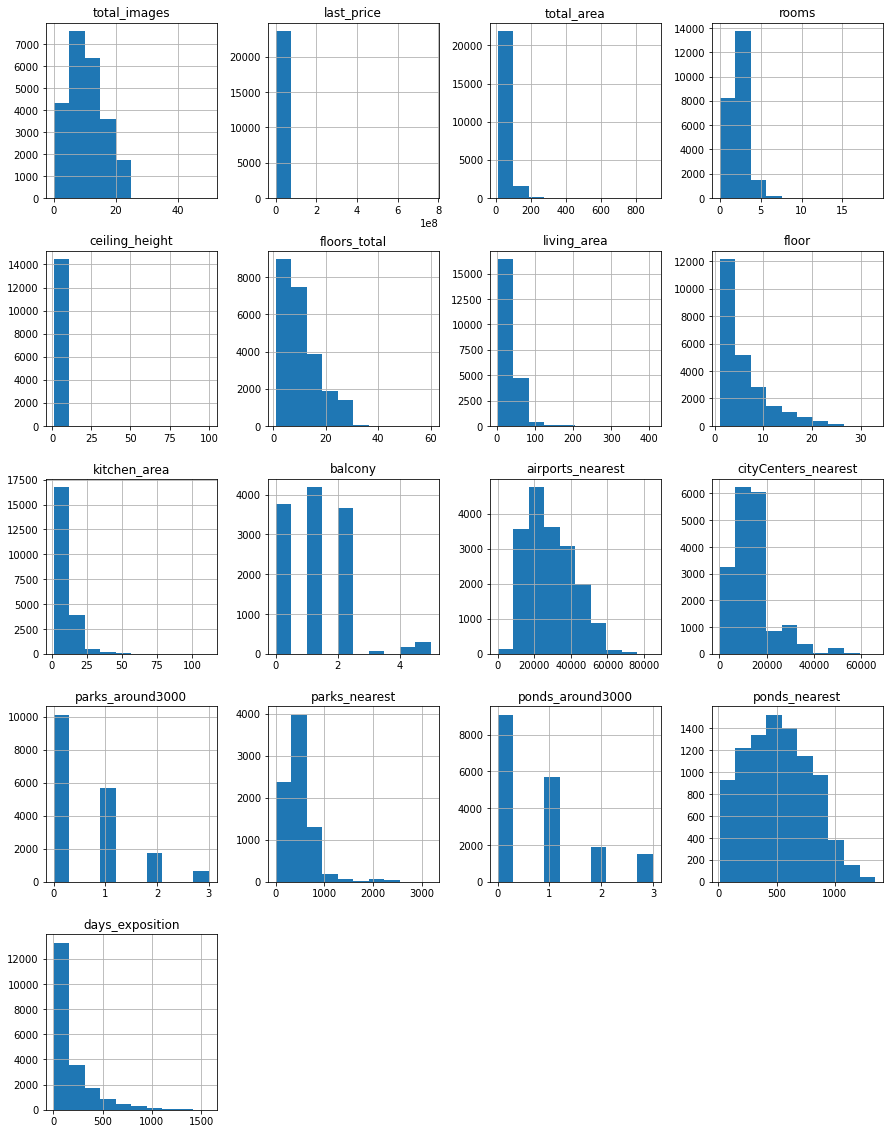

In [5]:
#обзор первых гистограмм по каждому параметру
data.hist(figsize=(15, 20))
plt.show()

Всего в таблице 23699 записи по 22 параметрам.  
Был рассчитан процент пропусков по каждому параметру.   
Больше всего пропусков в столбцах is_apartment, parks_nearest, ponds_nearest - больше 50%.   
Определены уникальные названия с целью выявления дублей.

### Предобработка данных

In [6]:
#заполнение пропусков в столбце is_apartment
print(len(data.loc[data['is_apartment'].isna()]))
print(len(data.loc[data['floors_total'].isna()]))

20924
86


В столбце, отмечающем тип недвижимости много пропусков.   
В исследовании он будет использоваться мало.   Не будем прибегать к удалению строк.      
Здесь можно только изменить тип значений с object на Bool.     
86 пропусков в столбце floors_total, количество не критично. Можно удалить.

In [7]:
#удалим пустые значения
data = data.loc[~(data['floors_total'].isna())]


In [8]:
#изменение типов данных в столбцах
data['is_apartment'] = data['is_apartment'].astype('bool')
data['floors_total'] = data['floors_total'].astype('int64')
data['last_price'] = data['last_price'].astype('int64')

#преобразование даты и времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [9]:
#заполнение пропусков в столбце по количетву комнат
display(data['rooms'].value_counts())

1     8015
2     7913
3     5795
4     1177
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [10]:
display(data.loc[data['rooms'] == 0].min(), data.loc[data['rooms'] == 0].max())


total_images                              0
last_price                           945750
total_area                             15.5
first_day_exposition    2015-02-11 00:00:00
rooms                                     0
ceiling_height                          2.5
floors_total                              3
living_area                             2.0
floor                                     1
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                            NaN
balcony                                 0.0
locality_name                    Всеволожск
airports_nearest                     6989.0
cityCenters_nearest                  1261.0
parks_around3000                        0.0
parks_nearest                          38.0
ponds_around3000                        0.0
ponds_nearest                          72.0
days_exposition                         3.0
dtype: object

total_images                             21
last_price                         71000000
total_area                            371.0
first_day_exposition    2019-04-26 00:00:00
rooms                                     0
ceiling_height                         27.0
floors_total                             35
living_area                            68.0
floor                                    26
is_apartment                           True
studio                                 True
open_plan                              True
kitchen_area                            NaN
balcony                                 2.0
locality_name                посёлок Шушары
airports_nearest                    55551.0
cityCenters_nearest                 29846.0
parks_around3000                        2.0
parks_nearest                        1199.0
ponds_around3000                        3.0
ponds_nearest                        1159.0
days_exposition                       931.0
dtype: object

Т.к. у всех квартир есть площать от 15 до 371 м2, а тип апартаментов не был указан для них, 
то определить количество комнат не представляется возможным - 
это могут быть и однокомнатные квартиры, квартиры-студии и иные объекты.

In [11]:
#заполнение пробелов с столбце потолки
print(len(data.loc[data['ceiling_height'].isna()]))

9118


Пропусков ощутимо много, но в последующем будет доказано, что в выборке данных разброс невелик (разница между средним и медианным значением мала)
Поэтому заполним пропуски медианным значением

In [12]:

for a in data['locality_name'].unique():
    data.loc[(data['locality_name'] == a) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == a), 'ceiling_height'].median()
print(len(data.loc[data['ceiling_height'].isna()]))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

154


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Всего пропусков в стобце "Всего этажей" было 86 (см. info()). Восстановить по другим параметрам невозможно. Количество малое. Отсутвие данных в ней не скажется на анализе

In [13]:
#замена пропусков в столбце 'balcony' на 0, т.к. пропущенные значения соотвутствуют отсутствию балкона, и заменим тип на целочисленное
print(len(data.loc[data['balcony'].isna()]))
data['balcony'] = data['balcony'].fillna(value = 0)
data['balcony'] = data['balcony'].astype('int64')

11480


In [14]:
# заполняем пропуски в столбце "Гостиная"
print(len(data.loc[data['living_area'].isna()]))


1870


Пропуски восполнить невозможно изходя из имеющихся данных, оставляем без изменений

In [15]:
# заполняем пропуски в столбце "Кухня"
print(len(data.loc[data['kitchen_area'].isna()]))


2231


Количество пропусков значительное, но восполнить невозможно, оставляем без изменений

In [16]:
# в столбце названий населённых пунктов замена "ё" на "е", отсутствующие отметим как "Неизвестно"
print(len(data.loc[data['locality_name'].isna()]), len(data['locality_name'].unique()))
print(data['locality_name'].value_counts())
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].fillna('Неизвестно', inplace=True)
print(len(data.loc[data['locality_name'].isna()]), len(data['locality_name'].unique()))


48 365
Санкт-Петербург                               15651
посёлок Мурино                                  520
посёлок Шушары                                  439
Всеволожск                                      398
Пушкин                                          369
                                              ...  
поселок Возрождение                               1
деревня Трубников Бор                             1
посёлок при железнодорожной станции Вещево        1
коттеджный поселок Кивеннапа Север                1
деревня Большая Пустомержа                        1
Name: locality_name, Length: 364, dtype: int64
0 331


In [17]:
display(data.head(10))
data.info()
display(round(data.isna().sum() / len(data) * 100, 2))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.700,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.615,11,18.60,1,True,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.700,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.700,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.030,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.600,12,14.40,5,True,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.640,26,10.60,6,True,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,2.700,24,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.700,27,15.43,26,True,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.500,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23459 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height           0.65
floors_total             0.00
living_area              7.92
floor                    0.00
is_apartment             0.00
studio                   0.00
open_plan                0.00
kitchen_area             9.45
balcony                  0.00
locality_name            0.00
airports_nearest        23.43
cityCenters_nearest     23.33
parks_around3000        23.33
parks_nearest           65.93
ponds_around3000        23.33
ponds_nearest           61.63
days_exposition         13.43
dtype: float64

Количество пропусков стало значительно меньше.   
Нас интересуют ключевые параметры, влияющие на стоимость объектов - им было уделено большее количество внимания.   
Такие параметры как расстояние до ближайшего парка, аэропорта, пруда не планируем использовать.  Таким образом пропуски в этих данных остались, т.к. не внесут критических изменений в ход исследования.  
Пропуски в таких параметрах как расстояние до центра города и количество дней продажи не представляется возможным заполнить по имеющимся данным - они остались неизменными.

In [18]:
display(data.isna().sum())
display(data)
print(data['locality_name'].value_counts().head(10))
#print(data['locality_name'].unique())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            154
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.700,16,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.615,11,18.6,1,True,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.700,5,34.3,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.700,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.030,14,32.0,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.700,5,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15,3,2.500,5,38.0,4,True,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76.75,2017-03-28,2,3.000,17,NaN,12,True,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Санкт-Петербург      15651
поселок Мурино         552
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64


В исходной таблице было обнаружено значительное количество пропусков в данных в столбцах: 
ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, 
parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition  

Есть предположение, что отсутствие данных сопряжено либо с системной ошибкой при сборе информации, либо с утратой данных.
В большинстве случаев данные невозможно было восстановить, 
так как был риск сильно повлиять на результат исследования при заполнении средними или медианными показателями, 
даже с учётом схожего географического положения объектов.

Были изменены тип данных в столбцах "is_apartment", "last_price", "floors_total".
Удалены 86 строк из-за отсутствия значений в столбце "floors_total".
В названиях населённых пунктов были заменены "ё" на "е" с целью ликвидации неявных дублей (дублей стало меньше на 31 запись) 
и отсутствующим названиям присвоено значение "Неизвестно".
    

    

    




### Посчитайте и добавьте в таблицу новые столбцы

In [19]:
#посчёт цены квадратного метра
data['price_1m2'] = round(data['last_price'] / data['total_area'], 1)

In [20]:
#добавление столбца с днями недели, месяцами и годами
data['publication_weekday']=data['first_day_exposition'].dt.weekday
data['publication_month']=data['first_day_exposition'].dt.month
data['publication_year']=data['first_day_exposition'].dt.year

In [21]:
#добавление столбца "Тип этажа"
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'Первый'
    elif floor == floors_total:
        return 'Последний'
    else:
        return 'Другой'

data['floor_type'] = data.apply(floor_type, axis = 1)

In [22]:
# соотношение площадей: жилой к общей и кухни к общей
data['living_to_total'] = round(data['living_area'] / data['total_area'], 1)
data['kitchen_to_total'] = round(data['kitchen_area'] / data['total_area'], 1)

In [23]:
#добавление столюца с расстоянием до центра в километрах округлённое
data['cityCenters__km']=data['cityCenters_nearest'] / 1000.
data['cityCenters__km'] = round(data['cityCenters__km'])

In [24]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m2,publication_weekday,publication_month,publication_year,floor_type,living_to_total,kitchen_to_total,cityCenters__km
0,20,13000000,108.00,2019-03-07,3,2.700,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019,Другой,0.5,0.2,16.0
1,7,3350000,40.40,2018-12-04,1,2.615,11,18.60,1,True,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,1,12,2018,Первый,0.5,0.3,19.0
2,10,5196000,56.00,2015-08-20,2,2.700,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3,8,2015,Другой,0.6,0.1,14.0
3,0,64900000,159.00,2015-07-24,3,2.700,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,4,7,2015,Другой,NaN,NaN,7.0
4,2,10000000,100.00,2018-06-19,2,3.030,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,Другой,0.3,0.4,8.0
5,10,2890000,30.40,2018-09-10,1,2.600,12,14.40,5,True,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.8,0,9,2018,Другой,0.5,0.3,NaN
6,6,3700000,37.30,2017-11-02,1,2.640,26,10.60,6,True,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.7,3,11,2017,Другой,0.3,0.4,19.0
7,5,7915000,71.60,2019-04-18,2,2.700,24,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.7,3,4,2019,Другой,NaN,0.3,12.0
8,20,2900000,33.16,2018-05-23,1,2.700,27,15.43,26,True,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.8,2,5,2018,Другой,0.5,0.3,NaN
9,18,5400000,61.00,2017-02-26,3,2.500,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.6,6,2,2017,Другой,0.7,0.1,15.0


Были добавленны столбцы с отношением площадей кухни и жилой зоны к общей площади объектов, 
отдельные столбцы по дате, месяцу и году публикации объявления,
типом этажа и ценой квадратного метра, расстояние до центра города в километрах.
В новых столбцах есть пропущенные значения там, где они присутствовали в исходной таблице в соответствующих строках

### Проведите исследовательский анализ данных

In [25]:
#изучение и описание параметров объектов с построением гистограмм:


count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

197.2


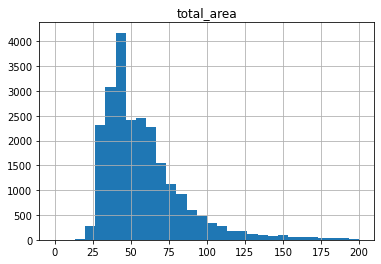

<AxesSubplot:>

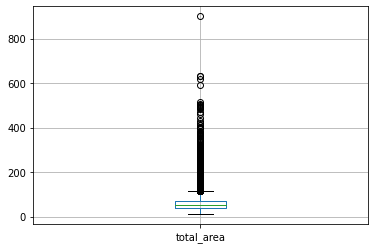

In [26]:
#изучем параметр общей площади объектов
display(data['total_area'].describe())
print(data['total_area'].quantile(0.99).round(1))
data.hist('total_area', bins=30, range = (0, 200))
plt.show()
data.boxplot('total_area')

30.0

114.8

-5.0

0.9476983017829161

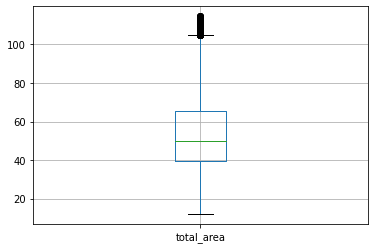

In [27]:
# рассчёт 3-го и 1-го квартилей, межквартильного размаха и границ максимального и минимального значений
q75 = data['total_area'].quantile(0.75)
q25 = data['total_area'].quantile(0.25)
iqr1 = round(q75 - q25, 0)
lim_max1 = q75 + 1.5 * iqr1
lim_min1 = q25 - 1.5 * iqr1
display(iqr1, lim_max1, lim_min1)

data_filtered_total_area = data[(data['total_area'] < lim_max1) & (data['total_area'] > lim_min1)]
data_filtered_total_area.boxplot('total_area')
display(len(data_filtered_total_area) / len(data))

Распределение значений параметра общей площади объектов близко к распределению Пуассона.  
Минимальная площадь = 12 м2.  
        Максимальное значение = 900 м2.  
        99% значений укладывается в отрезке от 12 до 200 м2, вне этого отрезка показатели можно считать выбросами  
        Медианное значение = 52.0   
        Среднее значение = 60.3  
        Данные немного смещены влево: большие по площади квартиры вносят явный вклад в смещение 
            
Методом межквартильных интервалов обозначим диапозон данных, исключающих выбросы:  
Межквартильный размах = 69 - 40 = 29  
Верхнюю границу: 69 + 1.5 * 29 = 114,5   
Нижняя границу: 40 - 1.5 * 29 = -5  
Таким образом выбросами были признаны 5% данных  


count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

36000000.0


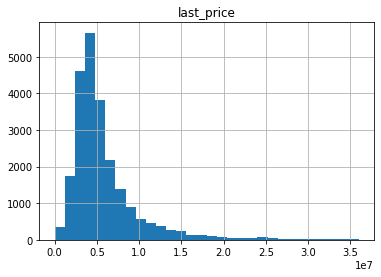

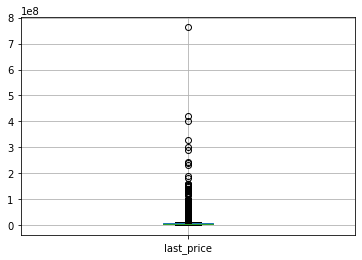

In [28]:
#изучем параметр стоимости объектов
display(data['last_price'].describe())
print(data['last_price'].quantile(0.99).round(1))
data.hist('last_price', bins=30, range = (0, 36000000))
plt.show()
data.boxplot('last_price')
plt.show()

3399000.0

11897500.0

-1698500.0

0.9132257654681744

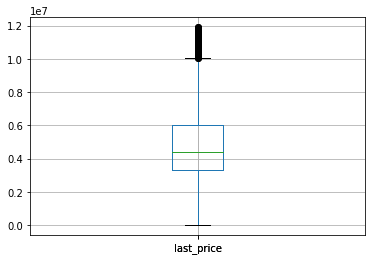

In [29]:

q75 = data['last_price'].quantile(0.75)
q25 = data['last_price'].quantile(0.25)
iqr2 = round(q75 - q25, 0)
lim_max2 = q75 + 1.5 * iqr2
lim_min2 = q25 - 1.5 * iqr2
display(iqr2, lim_max2, lim_min2)

data_filtered_last_price = data[(data['last_price'] < lim_max2) & (data['last_price'] > lim_min2)]
data_filtered_last_price.boxplot('last_price')
display(len(data_filtered_last_price) / len(data))
data_filtered_last_price.boxplot('last_price')
plt.show()

Распределение значений параметра стоимости объектов близко к распределению Пуассона.  
Минимальная площадь = 12190.  
Максимальное значение = 7630000000.  
99% значений укладывается в отрезке до 3600000, вне этого отрезка показатели можно считать выбросами  
Медианное значение = 4650000   
Среднее значение = 6540555  
Данные немного смещены влево: дорогие квартиры вносят явный вклад в смещение, несмотря на большое количество дешёвых квартир  
    
Методом межквартильных интервалов обозначим диапозон данных, исключающих выбросы:  
Межквартильный размах = 3399000  
Верхнюю границу: 11897500   
Нижняя границу: -1698500 
Таким образом выбросами были признаны 9% данных  

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

3.0


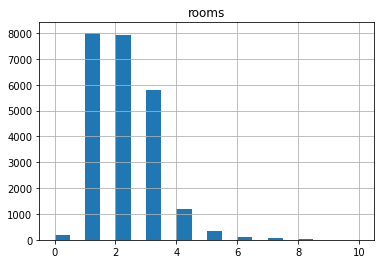

In [30]:
#изучем параметр количества комнат
display(data['rooms'].describe())
print(data['rooms'].quantile(0.9).round(1))
data.hist('rooms', bins=20, range = (0, 10))
plt.show()

2.0

6.0

-2.0

0.9835683733536611

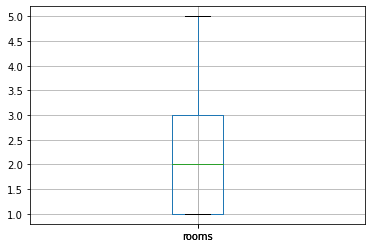

In [31]:
q75 = data['rooms'].quantile(0.75)
q25 = data['rooms'].quantile(0.25)
iqr3 = round(q75 - q25, 0)
lim_max3 = q75 + 1.5 * iqr3
lim_min3 = q25 - 1.5 * iqr3
display(iqr3, lim_max3, lim_min3)

data_filtered_rooms = data[(data['rooms'] < lim_max3) & (data['rooms'] > lim_min3) & (data['rooms'] > 0)]
data_filtered_rooms.boxplot('rooms')
display(len(data_filtered_rooms) / len(data))
data_filtered_rooms.boxplot('rooms')
plt.show()


Минимальная кол-во = 0.  
Максимальное кол-во = 19.  
99% значений меньше 5, вне этого отрезка показатели можно считать выбросами  
Медианное значение = 2   
Среднее значение = 2.07  
Медиана и среднее почти равны, разброс по количеству комнат очень мал.
Методом МКР исключены 2% данных

count    23459.000000
mean         2.734066
std          1.014544
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

4.0
2.5


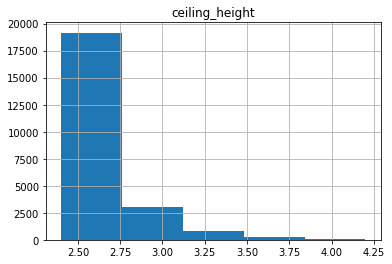

In [32]:
#изучем параметр высоты потолков
display(data['ceiling_height'].describe())
print(data['ceiling_height'].quantile(0.995).round(1))
print(data['ceiling_height'].quantile(0.005).round(1))
data.hist('ceiling_height', bins=5, range = (2.4, 4.2))
plt.show()

Распределение значений параметра высоты потолков в квартирах близко к распределению Пуассона.   
Минимальная высота = 1.  
Максимальная высота = 100.  
99% значений меньше 5 метров, вне этого отрезка показатели можно считать выбросами, в том числе высота в 100 метров.  
Медианное значение = 2.65   
Среднее значение = 2.77  
Медиана и среднее почти равны, разброс по высоте потолков мал.  
Делаем вывод, что выбросы прокатически отсутствуют

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

55.0


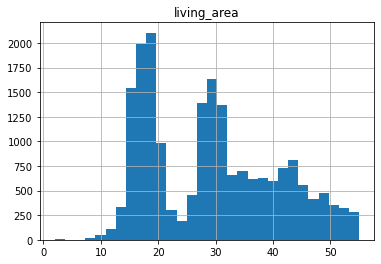

In [33]:
#изучем параметр площади жилой зоны
display(data['living_area'].describe())
print(data['living_area'].quantile(0.9).round(1))
data.hist('living_area', bins=30, range = (2, 55))
plt.show()

24.0

78.3

-17.4

0.8890865201372126

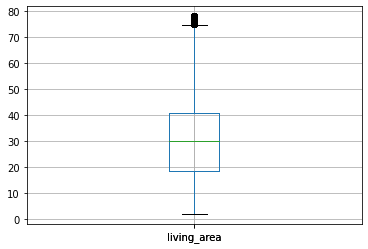

In [34]:
q75 = data['living_area'].quantile(0.75)
q25 = data['living_area'].quantile(0.25)
iqr4 = round(q75 - q25, 0)
lim_max4 = q75 + 1.5 * iqr4
lim_min4 = q25 - 1.5 * iqr4
display(iqr4, lim_max4, lim_min4)

data_filtered_living_area = data[(data['living_area'] < lim_max4) & (data['living_area'] > lim_min4)]
data_filtered_living_area.boxplot('living_area')
display(len(data_filtered_living_area) / len(data))
data_filtered_living_area.boxplot('living_area')
plt.show()


Наблюдается скачок на уровне 30-х метров,   
что можно отнести к особенностью конструирования квартир (разница между 2-х и 3-х комнатынми, в типичном случае - почти на 20 метров)  
Минимальная площадь = 1.  
Максимальная площадь = 409.  
99% значений от 10 до 55 метров, вне этого отрезка показатели можно считать выбросами   
Медианное значение = 30 метров   
Среднее значение = 22 метра  
Медиана и среднее различаются на треть, что объясняется разбросом данных.  

Методом межквартильных интервалов обозначим диапозон данных, исключающих выбросы:  
Межквартильный размах = 24  
Верхнюю границу: 78.3   
Нижняя границу: -17.4  
Таким образом выбросами были признаны 11% данных  

count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

15.9


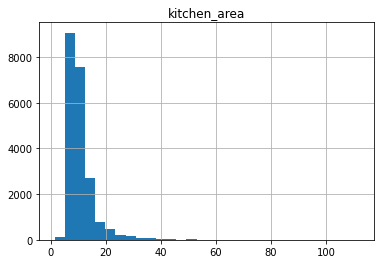

<AxesSubplot:>

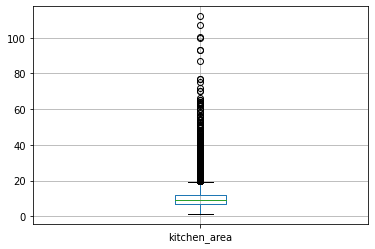

In [35]:
#изучем параметр площади кухни
display(data['kitchen_area'].describe())
print(data['kitchen_area'].quantile(0.9).round(1))
data.hist('kitchen_area', bins=30)
plt.show()
data.boxplot('kitchen_area')

5.0

19.5

-0.5

0.8547410324821073

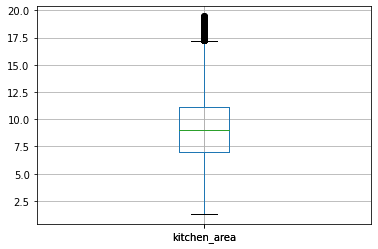

In [36]:
q75 = data['kitchen_area'].quantile(0.75)
q25 = data['kitchen_area'].quantile(0.25)
iqr5 = round(q75 - q25, 0)
lim_max5 = q75 + 1.5 * iqr5
lim_min5 = q25 - 1.5 * iqr5
display(iqr5, lim_max5, lim_min5)

data_filtered_kitchen_area = data[(data['kitchen_area'] < lim_max5) & (data['kitchen_area'] > lim_min5)]
data_filtered_kitchen_area.boxplot('kitchen_area')
display(len(data_filtered_kitchen_area) / len(data))
data_filtered_kitchen_area.boxplot('kitchen_area')
plt.show()

Распределение значений параметра площади кухни объектов близко к распределению Пуассона.  
Минимальная площадь = 1.3.  
Максимальная площадь = 112 (что, возможно, ошибка)  
99% значений меньше 15.9.  
Медианное значение = 9.1   
Среднее значение = 10.56  
Медиана и среднее различаются почти на 13%, разброс данных ощутим.
По методу МКР выбросами были признаны 15% данных, от такого количества записей избавляться нельзя - возможно сильное влияние на результаты исследования.  




count    23613.000000
mean         5.877313
std          4.873539
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

13.0


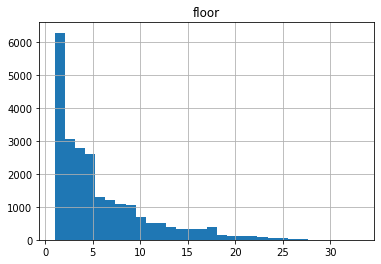

In [37]:
#изучем параметр этажа расположения квартиры

display(data['floor'].describe())
print(data['floor'].quantile(0.9).round(1))
data.hist('floor', bins=30)
plt.show()

Распределение номера этажа расположения квартиры близко к распределению Пуассона.  
Минимальный этаж = 1  
Максимальный этаж = 33  
99% значений меньше 13  
Медианное значение = 4   
Среднее значение = 5.9 (ближе к 6)  

Другой       17363
Последний     3336
Первый        2914
Name: floor_type, dtype: int64
73.53152924236649
12.340659806039046
14.12781095159446


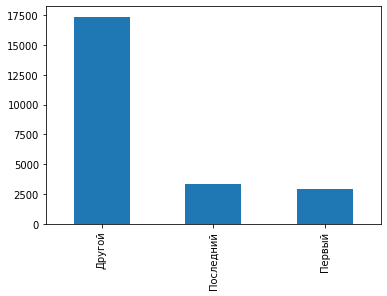

In [38]:
#изучем параметр типа этажа расположения квартиры


data_floor_type=data['floor_type'].value_counts()
print(data_floor_type)
data_floor_type.plot(kind='bar')
print(len(data.query('floor_type == ["Другой"]'))/ len(data) *100)
print(len(data.query('floor_type == ["Первый"]'))/ len(data) *100)
print(len(data.query('floor_type == ["Последний"]'))/ len(data) *100)
#plt.show()

По составу расположения квартир на этаже отметим:  
На первом этаже находятся 12% квартир  
На последнем - 14%  
Остальные квартиры находятся на иных этажах - их 74%  

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

22.0


array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

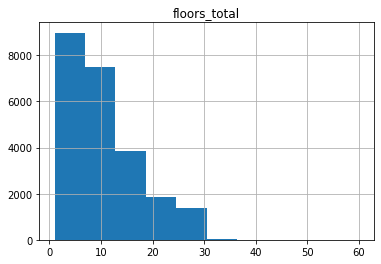

In [39]:
#изучем параметр общего количества этажей в здании

display(data['floors_total'].describe())
print(data['floors_total'].quantile(0.9).round(1))
data.hist('floors_total', bins=10)

Распределение общего количества этажей в здании близко к распределению Пуассона.  
Минимальный этаж = 1  
Максимальный этаж = 60  
99% значений меньше 22  
Медианное значение = 9    
Среднее значение = 10  
Медиана и среднее отличаются примерно на 10 процентов.

count    18104.000000
mean     14185.084015
std       8614.132292
min        181.000000
25%       9233.750000
50%      13093.000000
75%      16287.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

26116.6
4765.3


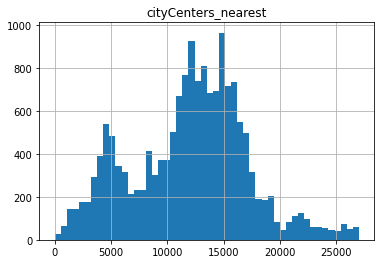

<AxesSubplot:>

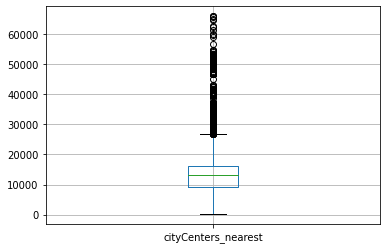

In [40]:
#изучем параметр расстояния до центра города в метрах
display(data['cityCenters_nearest'].describe())
print(data['cityCenters_nearest'].quantile(0.9).round(1))
print(data['cityCenters_nearest'].quantile(0.1).round(1))
data.hist('cityCenters_nearest', bins=50, range=(0, 27000))

plt.show()
data.boxplot('cityCenters_nearest')

7053.0

26866.5

-1345.75

0.6936856816160589

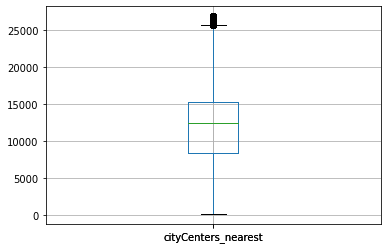

In [41]:
q75 = data['cityCenters_nearest'].quantile(0.75)
q25 = data['cityCenters_nearest'].quantile(0.25)
iqr6 = round(q75 - q25, 0)
lim_max6 = q75 + 1.5 * iqr6
lim_min6 = q25 - 1.5 * iqr6
display(iqr6, lim_max6, lim_min6)

data_filtered_cityCenters = data[(data['cityCenters_nearest'] < lim_max6) & (data['cityCenters_nearest'] > lim_min6)]
data_filtered_cityCenters.boxplot('cityCenters_nearest')
display(len(data_filtered_cityCenters) / len(data))
data_filtered_cityCenters.boxplot('cityCenters_nearest')
plt.show()

Рассмотрим параметр расстояния от центра в метрах  
Минимальное расстояние = 181  
Максимальное расстояние = 65968  
99% значений меньше 26116.6  
Медианное значение = 13093   
Среднее значение = 14185  
Медиана и среднее менее чем на 10 процентов, разброс по расстоянию до центра  мал.  
Однако метод МКР выявил большое количество выбросов (около 39%).
От такого количества данных мы не можем позволить себе избавляться. Будем учитывать спицифику содержания этого столбца.

count    18081.000000
mean     28788.008185
std      12626.209956
min          0.000000
25%      18575.000000
50%      26726.000000
75%      37242.000000
max      84869.000000
Name: airports_nearest, dtype: float64

47057.0


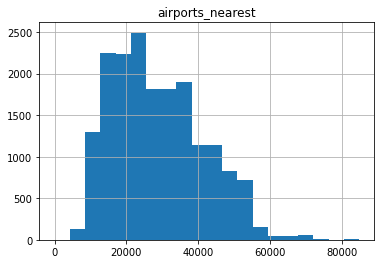

In [42]:
#изучем параметр расстояния до ближайшего аэропорта
display(data['airports_nearest'].describe())
print(data['airports_nearest'].quantile(0.9).round(1))
data.hist('airports_nearest', bins=20)

plt.show()


Рассмотрим параметр расстояния до ближайшего аэропорта в метрах  
Минимальное расстояние = 0  
Максимальное расстояние = 84869  
99% значений меньше 47057  
Медианное значение = 26726   
Среднее значение = 28788  
Медиана и среднее менее чем на 7 процентов, разброс по расстоянию до аэропорта  мал.  

count    8045.000000
mean      490.554630
std       341.336698
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

761.0


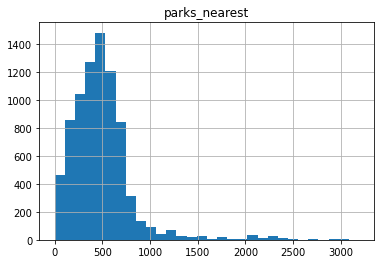

In [43]:
#изучем параметр расстояния до ближайшего парка
display(data['parks_nearest'].describe())
print(data['parks_nearest'].quantile(0.9).round(1))
data.hist('parks_nearest', bins=30)
plt.show()


Рассмотрим параметр расстояния до ближайшего парка в метрах  
Минимальное расстояние = 1  
Максимальное расстояние = 3190  
99% значений меньше 761  
Медианное значение = 455   
Среднее значение = 490  
Медиана и среднее незначительно разнятся, разброс по расстоянию до парка  мал.  

count    23613.000000
mean         2.568035
std          1.788565
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: publication_weekday, dtype: float64

5.0


array([[<AxesSubplot:title={'center':'publication_weekday'}>]],
      dtype=object)

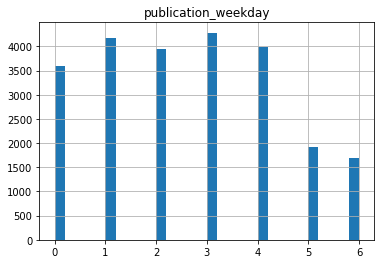

In [44]:
#изучем параметр дня публикации
display(data['publication_weekday'].describe())
print(data['publication_weekday'].quantile(0.9).round(1))
data.hist('publication_weekday', bins=30)

По гистограмме видно, что чаще всего объявления публикуют в будние дни.  
99% объявлений выложено с понедельник по пятницу  

count    23613.000000
mean         6.400076
std          3.493160
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: publication_month, dtype: float64

11.0


array([[<AxesSubplot:title={'center':'publication_month'}>]], dtype=object)

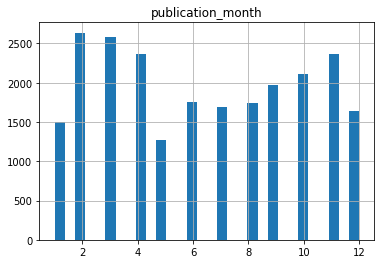

In [45]:
#изучем параметр месяца публикации
display(data['publication_month'].describe())
print(data['publication_month'].quantile(0.9).round(1))
data.hist('publication_month', bins=30)

По гистограмме видно, что чаще всего публикации появляются в период с феварль по апрель.

count    23613.000000
mean      2017.368102
std          1.039383
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: publication_year, dtype: float64

2019.0


array([[<AxesSubplot:title={'center':'publication_year'}>]], dtype=object)

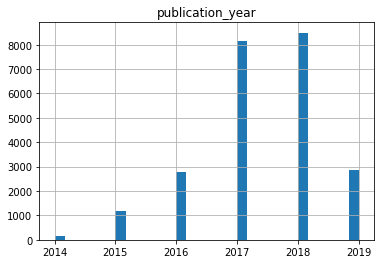

In [46]:
display(data['publication_year'].describe())
print(data['publication_year'].quantile(0.9).round(1))
data.hist('publication_year', bins=30)

Видно, что рынок недижимости заметно вырос в 2017-2018 годах - больше всего публикаций пришлось на этот период

In [47]:
# Код ревьюера

low_percentele = 0.01
hihg_percentele = 0.99

last_price_low = data['last_price'].quantile(low_percentele)
last_price_high = data['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Верхняя граница last_price {last_price_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@last_price_low <= last_price <= @last_price_high'))
        / len(data['last_price']) * 100,
        2
    ),
    '%'
)

Нижняя граница last_price 1000000.0
Верхняя граница last_price 36000000.0
Процент отброшенных значений =  1.95 %


0.68


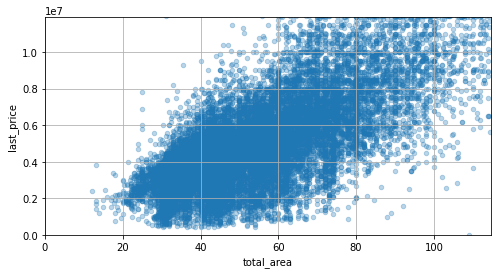

In [48]:
#Изучение влияния различных факторов на стоимость жилья
#влияние общей площади
ax = data_filtered_total_area.plot(x = 'total_area',
               y = 'last_price',
               kind = 'scatter',
               style = 'o',
               alpha = 0.3,
               figsize = (8, 4),
               xlim = (0, lim_max1),
               ylim = (0, lim_max2),
               grid = True
              )
print(round(data_filtered_total_area['last_price'].corr(data_filtered_total_area['total_area']), 2))

График отображает рост стоимости квартиры в зависимости от увеличения общей площади жилья.  
Эту же динамику демонстрирует коеффициент Пирсона.   
Он равен 0.68, что отражает слабую положительную зависимость между этими параметрами  

0.48


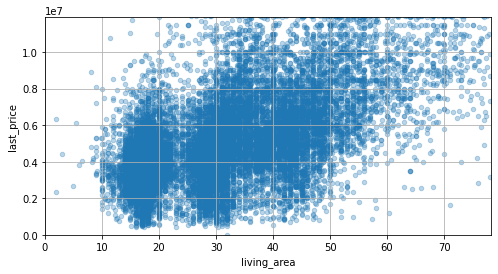

In [49]:
#влияние жилой площади
ax = data_filtered_living_area.plot(x = 'living_area',
               y = 'last_price',
               kind = 'scatter',
               style = 'o',
               alpha = 0.3,
               figsize = (8, 4),
               xlim = (0, lim_max4),
               ylim = (0, lim_max2),
               grid = True
              )
print(round(data_filtered_living_area['last_price'].corr(data_filtered_living_area['living_area']), 2))

График отображает рост стоимости квартиры в зависимости от общей площади жилья.  
Эту же динамику демонстрирует коеффициент Пирсона.   
Он равен 0.48, что отражает слабую положительную зависимость между этими параметрами  

0.46


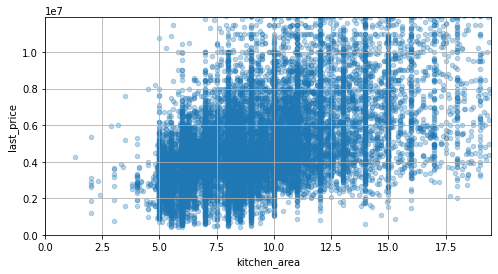

In [50]:
#влияние площади кухни
ax = data_filtered_kitchen_area.plot(x = 'kitchen_area',
               y = 'last_price',
               kind = 'scatter',
               style = 'o',
               alpha = 0.3,
               figsize = (8, 4),
               xlim = (0, lim_max5),
               ylim = (0, lim_max2),
               grid = True
              )
print(round(data_filtered_kitchen_area['last_price'].corr(data_filtered_kitchen_area['kitchen_area']), 2))

График отображает рост стоимости квартиры в зависимости от площади кухни.    
Эту же динамику демонстрирует коеффициент Пирсона.     
Он равен 0.46, что отражает слабую положительную зависимость между этими параметрами    

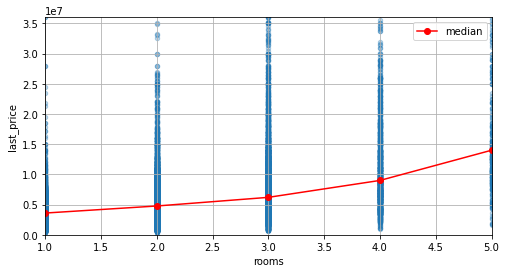

0.36


In [51]:
#количества комнат
ax = data.plot(x = 'rooms',
               y = 'last_price',
               kind = 'scatter',
               style = 'o',
               alpha = 0.3,
               figsize = (8, 4),
               xlim = (1, 5),
               ylim = (0, 36000000),
               grid = True
              )
data.groupby('rooms')['last_price'].agg(['median']).plot(ax = ax,
               y = 'median',
               style = '-or',
               legend = True,
               label = 'median',
               grid = True
              )
              
        
plt.show()
print(round(data['last_price'].corr(data['rooms']), 2))

График отображает рост стоимости квартиры в зависимости от общей площади жилья.  
Эту же динамику демонстрирует коеффициент Пирсона.   
Он равен 0.36, что отражает слабую положительную зависимость между этими параметрами  

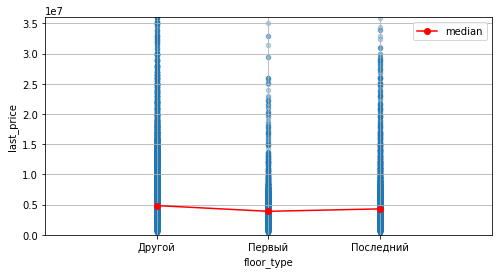

In [52]:
#тип этажа
ax = data.plot(x = 'floor_type',
               y = 'last_price',
               kind = 'scatter',
               style = 'o',
               alpha = 0.3,
               figsize = (8, 4),
               xlim = (-1, 3),
               ylim = (0, 36000000),
               grid = True
              )
data.groupby('floor_type')['last_price'].agg(['median']).plot(ax = ax,
               y = 'median',
               style = '-or',
               legend = True,
               label = 'median',
               grid = True
              )
              
        
plt.show()

По графику медианной стоимости видно, что параметр высоты расположения квартиры не влияет на стоимость объекта

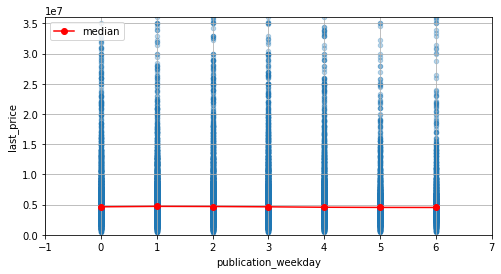

In [53]:
#дня публикации
ax = data.plot(x = 'publication_weekday',
               y = 'last_price',
               kind = 'scatter',
               style = 'o',
               alpha = 0.3,
               figsize = (8, 4),
               xlim = (-1, 7),
               ylim = (0, 36000000),
               grid = True
              )
data.groupby('publication_weekday')['last_price'].agg(['median']).plot(ax = ax,
               y = 'median',
               style = '-or',
               legend = True,
               label = 'median',                                                        
               grid = True
              )
              
        
plt.show()

По графику медианной стоимости видно, что параметр дня публикации не влияет на стоимость объекта

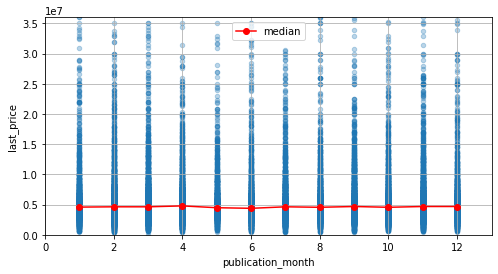

In [54]:
#месяца публикации
ax = data.plot(x = 'publication_month',
               y = 'last_price',
               kind = 'scatter',
               style = 'o',
               alpha = 0.3,
               figsize = (8, 4),
               xlim = (0, 13),
               ylim = (0, 36000000),
               grid = True
              )
data.groupby('publication_month')['last_price'].agg(['median']).plot(ax = ax,
               y = 'median',
               style = '-or',
               legend = True,
               label = 'median',                                                        
               grid = True
              )
              
        
plt.show()

По графику медианной стоимости видно, что параметр месяца публикации не влияет на стоимость объекта

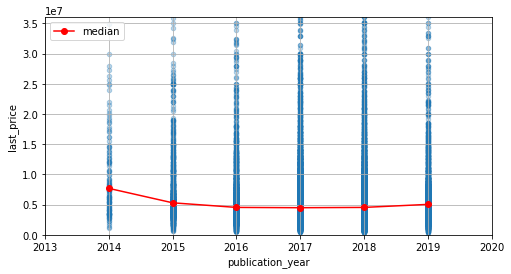

-0.04


In [55]:
#Год публикации
ax = data.plot(x = 'publication_year',
               y = 'last_price',
               kind = 'scatter',
               style = 'o',
               alpha = 0.3,
               figsize = (8, 4),
               xlim = (2013, 2020),
               ylim = (0, 36000000),
               grid = True
              )
data.groupby('publication_year')['last_price'].agg(['median']).plot(ax = ax,
               y = 'median',
               style = '-or',
               legend = True,
               label = 'median',                                                        
               grid = True
              )
              
        
plt.show()
print(round(data['last_price'].corr(data['publication_year']), 2))

138959.5


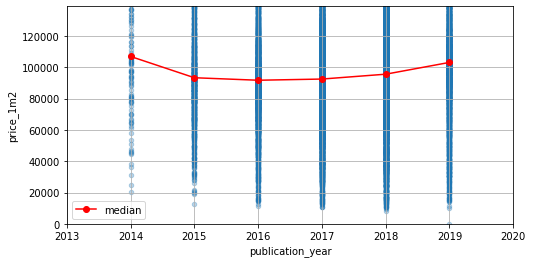

0.01


In [56]:
# расчёт зависимости цены квадратного метра по годам

print(data['price_1m2'].quantile(0.9).round(1))
ax = data.plot(x = 'publication_year',
               y = 'price_1m2',
               kind = 'scatter',
               style = 'o',
               alpha = 0.3,
               figsize = (8, 4),
               xlim = (2013, 2020),
               ylim = (0, 138959.5),
               grid = True
              )

data.groupby('publication_year')['price_1m2'].agg(['median']).plot(ax = ax,
               y = 'median',
               style = '-or',
               legend = True,
               label = 'median',                                                        
               grid = True
              )
              
        
plt.show()
print(round(data['price_1m2'].corr(data['publication_year']), 2))

На графике видно, что медианная стоимость с 2014 года снизислась.  
Тем не менее, при анализе динамики изменения медианной цены за квадратный метр заметно, что в 2018-2019 годах она начинает медленно расти.



count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

1067.0 4.0


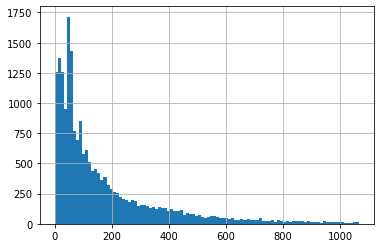

<AxesSubplot:>

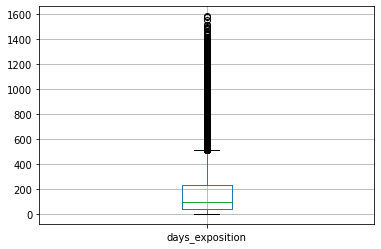

In [57]:
#изучение скорости продажи объекта
#находим распределение значений, среднего и медианного 
display(data['days_exposition'].describe())
# вычисление 99-ого и 1-го персентеля 
print(data['days_exposition']. quantile ( .99 ).round(1), data['days_exposition']. quantile ( .01 ).round(1))
data['days_exposition'].hist(bins=100, range=(0, 1067))
plt.show()
data.boxplot('days_exposition')

Анализ зависимости факта продажи от количества дней показа объявлений:  
Среднее значение: 180  
Медианное значение: 95  
1-й персентель: 4  
99-й персентель: 1067  
Среднее значение в 2 раза больше медианного. Это означает,   
что в выборке присутствует ощутимое количество квартир, которые долго остаются невостребованными у покупателей.  

Большинство квартир проданы за срок от 45 до 232 дней.   
1% объявлений были сняты за 4 и меньше дней - необычно короткий срок  

В данных наблюдаются выбросы. Чтобы их исключить рассчитаем:  
Межквартильный размах = 232 - 45 = 187  
Рассчитаем верхнюю границу: 232 + 1.5 * 187 = 512  
Время продажи квартиры больше 512 дней можно считать необычно долгим.  

Санкт-Петербург      15651
поселок Мурино         552
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64


<AxesSubplot:xlabel='locality_name'>

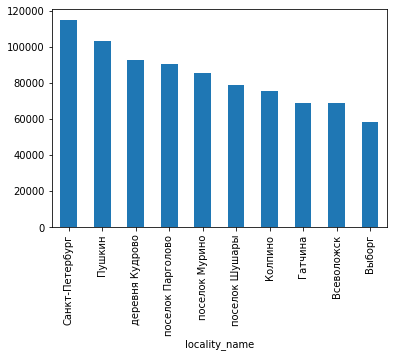

In [58]:
#расчёт средней цены жилья в топ-10 населённых пунктов по количеству объялений

data_mean_price = data['locality_name'].value_counts().head(10)
print(data_mean_price)
data['price_1m2'] = data['last_price'] / data['total_area']
data_cast = data.query('locality_name == ["Санкт-Петербург", "поселок Мурино", "поселок Шушары", "Всеволожск", "Пушкин", "Колпино", "поселок Парголово", "Гатчина", "деревня Кудрово", "Выборг"] ')
#display(data_cast)
data_cast.groupby('locality_name')['price_1m2'].mean().sort_values(ascending=False)

data_mean_price = data_cast.groupby('locality_name')['price_1m2'].mean().sort_values(ascending=False)
data_mean_price.plot(kind='bar')


In [59]:
#средняя и медианная стоимость квадратного метра
display(data_cast.groupby('locality_name')['price_1m2'].mean().sort_values().round(1))
max_price=data_cast.groupby('locality_name')['price_1m2'].mean().max()
min_price=data_cast.groupby('locality_name')['price_1m2'].mean().min()
print('Максимальная цена', max_price)
print('Минимальная цена', min_price)

locality_name
Выборг                58141.9
Всеволожск            68654.5
Гатчина               68746.1
Колпино               75424.6
поселок Шушары        78551.3
поселок Мурино        85629.6
поселок Парголово     90175.9
деревня Кудрово       92473.5
Пушкин               103125.8
Санкт-Петербург      114868.9
Name: price_1m2, dtype: float64

Максимальная цена 114868.87734123527
Минимальная цена 58141.909153318615


Самая высокая средняя стоимость жилья в Санкт-Петербурге: 114868.9 за квадратный метр  
Самая низкая средняя стоимость жилья в Выборге: 58141.9 за квадратный метр  

-0.21


/tmp/ipykernel_138/76653092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stp['cityCenters__km']=data_stp['cityCenters__km'].round()


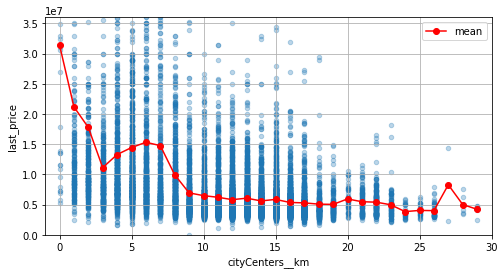

In [60]:
#выявление закономерности влияния стоимости жилья от близости к центру Санкт-Петербурга
data_stp=data.query('locality_name == "Санкт-Петербург"')
data_stp['cityCenters__km']=data_stp['cityCenters__km'].round()
ax = data_stp.plot(x = 'cityCenters__km',
               y = 'last_price',
               kind = 'scatter',
               style = 'o',
               alpha = 0.3,
               figsize = (8, 4),
               xlim = (-1, 30),
               ylim = (0, 36000000),
               grid = True
              )



#print(data_stp.groupby('cityCenters__km')['last_price'].mean())
data_stp.groupby('cityCenters__km')['last_price'].agg(['mean']).plot(ax = ax,
               y = 'mean',
               style = '-or',
               legend = True,
               label = 'mean',                                                        
               grid = True
              )


print(round(data['last_price'].corr(data['cityCenters__km']), 2))

26458140.8
5150000.0
count    2.800000e+03
mean     1.072081e+07
std      4.810871e+06
min      5.155000e+06
25%      7.100000e+06
50%      9.200000e+06
75%      1.292291e+07
max      2.645000e+07
Name: last_price, dtype: float64
17900000.0
6000000.0
-0.07


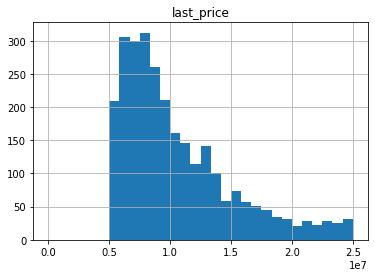

In [61]:
data_stp_center=data_stp.query('cityCenters__km < 8')
#display(data_stp['last_price'].describe())
print(data_stp_center['last_price'].quantile(0.9).round(1))
print(data_stp_center['last_price'].quantile(0.1).round(1))

#убираем выбросы в центре
data_stp_center_sel=data_stp_center.query('last_price > 5150000 and last_price < 26458140')


print(data_stp_center_sel['last_price'].describe())
data_stp_center_sel.hist('last_price', bins=30, range=(0, 25000000))
print(data_stp_center_sel['last_price'].quantile(0.9).round(1))
print(data_stp_center_sel['last_price'].quantile(0.1).round(1))


print(round(data_stp_center_sel['last_price'].corr(data['cityCenters__km']), 2))

Распределение значений параметра общей площади объектов близко к распределению Пуассона.  
Показатели стоимости в рублях в центре города:  
Средняя стоимость = 10720810   
Медианная стоимость = 9200000  
Минимальная цена = 5155000  
Максимальная цена = 2645000  
Разница среднего и медианного почти 10 процентов, есть разброс  

9092000.0
3390000.0


count    9.169000e+03
mean     5.229412e+06
std      1.364450e+06
min      3.392333e+06
25%      4.150000e+06
50%      4.900000e+06
75%      6.000000e+06
max      9.090000e+06
Name: last_price, dtype: float64

7300000.0
3700000.0


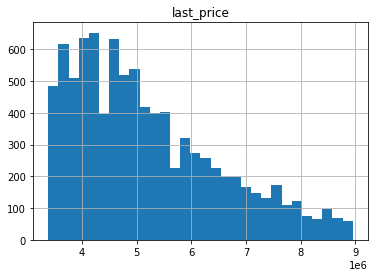

-0.03


In [62]:
#смотрим цены вне центра
data_stp_out=data_stp.query('cityCenters__km > 8')
print(data_stp_out['last_price'].quantile(0.9).round(1))
print(data_stp_out['last_price'].quantile(0.1).round(1))

#убираем выбросы
data_stp_out_sel=data_stp_out.query('last_price > 3390000 and last_price < 9092000')

display(data_stp_out_sel['last_price'].describe())
print(data_stp_out_sel['last_price'].quantile(0.9).round(1))
print(data_stp_out_sel['last_price'].quantile(0.1).round(1))

data_stp_out_sel.hist('last_price', bins=30, range=(3380000, 8950000))
plt.show()
print(round(data_stp_out_sel['last_price'].corr(data['cityCenters__km']), 2))


Показатели стоимости в рублях вне центра города:  
Средняя стоимость = 5229412  
Медианная стоимость = 4900000  
Минимальная цена = 3392333  
Максимальная цена = 9090000  
Разница между медианным и средним незначительная, разброс не сильный  

График отображает снижение стоимости квартиры в зависимости от расстояния от центра города.  
Эту же динамику демонстрирует коеффициент Пирсона.   
Он равен -0.21, что отражает слабую отрицательную зависимость между этими параметрами.  
Также по графику можно отметить на резкий рост цен в радиусе от 0 до 3 км. от центра.  
Радиусом второго порядка можно считать расстояние от 3 до 7 км от центра - здесь средняя цена тоже высокая.  
По уровню цен условно можно считать расстояние от 0 до 7 км - центр города.  
Такое деление было проверено коэффициентом Пирсона: в обоих случаях - внутри и вне центра города - он приближается к нулю.  
Это значит, что внутри этих радиусов больше не работает зависимость от расстояния до центра города  




### Общий вывод

В ходе исследования рынка недвижимости в Санкт-Петербурге и близлежащих населённых пунктах была проведена работа по выявлению ключевых параметров, влияющих на стоимсоть недвижимости.  

На начальном этапе при ознакомлении с содержимым сводной таблицей возникла необходимость по проработке несовершенств, которые в последствие могли оказать сильное влияние на итоговые результаты анализа.
Таким образом были замечены:    
    1. Пропуски: по некоторым категорям были упощены до 60% данных  
    2. Неявные дубли  
    3. Некорректное отоборажение типа данных  
Была проведена работа по устранению этих факторов:  
    1. Были заполнены пропуски, где это возможно. Так пропуски данных о высоте потолков были заполнены медианным значением.     
    Отсутствие данных в столбце, отображающего наличие балкона, было отмечено нулём вместо пустот, и данные приведены к целочисленному типу.    
    2. Написание названий населённых пункотов было унифицировано. С помощью замены "ё" на "е" данные были приведены к однотипному написанию.  
    3. Тип данных был изменён и приведён к единству внутри. Так цена квартиры и количество этажей в здании были приведены к целочисленным.     
    4. Было преобразовно отображение даты публикации.    
Предположительно неполнота таблицы стала следствием :  
    1. Несовершенства автоматизированного сбора информации о местоположении объектов.  
    2. Ошибок при сборе информации о параметрах жилья  
    
Предобработка данных включала в себя вычисление и добавление к полученному своду информации дополнительных параметров, таких как:  
    1. День публикации  
    2. Месяц публикации  
    3. Год публикации
    4. Средняя цена за квадратный метр недвижимости  
    5. Расстояние от центра города в километрах  
    
   
Исследование требовало учёта факторов, которые потенциально могли бы негативно отразится на репрезентативности исследования. 
Таким образом работа по выявлению ключевых параметров, оказывающих влияние на стоимость жилья предворяли следующие действия:     
1. Визуализация распределения показателей с помощью гистограмм и графиков распределения   
2. Рассчёт среднего и медианного показателя   
3. Выявление сильно отличающихся значений    
4. Рассчёт коэффициентов корреляции, отображающих степени влияния каждого конкретного параметра на стоимость жилья  
5. Построение графиков распределения. 
    

Были выявлены параметры, оказывающие наиболее сильное влияние на стоимость квартиры:  
    1. Рост стоимости объектов наблюдался при увеличении: 
        - общей площади: положительный коэффициент зависимости 0.68,   
        - площади кухни: положительный коэффициент зависимости 0.46,   
        - площади жилой зоны: положительный коэффициент зависимости 0.48,  
        - количества комнат: положительный коэффициент зависимости 0.36
    2. Стоимость жилья уменьшалась по мере удаления объектов от центра города
    3. Стоимость жилья не меняется в зависимости от:
        - Дня недели публикации объявления  
        - Месяца публикации объявления
        - Этажа расположения объекта  
        
Также при анализе цен в зависимости от году публикации, было обнаружено, что общая стоимость объектов снижалась с 2014-го года.  
Однако средняя стомость квадратного метра демонстрирует медленный рост с 2018 года.  

При изучении стоимости жилья были вычислены максимальные и минимальные средние стоимости квадратного метра объектов среди городов из первой десятки по количеству объявлений:
среди них в Выборге самая низкая средняя стоимость равна 58141.9 рублям,  
в Санкт-Петербурге самая высокая стоимость - 114868.9.  

Непосредственно в Санкт-Петербурге была выявлена зависимость стоимости жилья по отношению к удалённости от центра.
Для этого была построена визуализация распределения объявлений по километрам в зависимости от стоимости, и построен график медианной стоимости каждого километра.
На графиках видно, что близость к центру города очень сильно влияет на стоимость квартир: медианная стоимость объектов в центре почти в 6 раз выше, чем вне него.
В ходе анализа была выявлена услованый радиус центра города: 7 км.
Этот вывод был проверен через:   
    1. Построение гистограмм распределения стоимостей объектов внутри и вне этого радиуса  
    2. Вычсиление средних и медианных показателей, их сопоставление  
    3. Вычисление коэффициента корреляции для обоих выборок
По окончанию исследования были получены подтверждения такого деления:  
    1. Коэффициент корреляции для всех объектов Санкт-Петербурга составил -0.21, что отображает негативное влияние удалённости от центра
    2. Для центра города коэффициент корреляции близок к нулю (-0.07), что отзначает отсутствие влияния расстояния до центра внутри радиуса 7 км
    3. Вне города этот коэффициент тоже близок к нулю (-0.03)
Два последних пункта доказывают, что мы корректно изолировали объекты в центре и вне центра города.

Были проанализированны данные по количеству дней продажи объектов.
Большинство из них было продано за срок от 45 до 232 дней.  
При сопоставлении среднего (180 дней) и медианного (95 дней) значения по количеству дней, была замечена разница между ними в два раза.  
Это означает, что разброс по этому параметру значителен.
Для исключения аномально долгих продаж был использован метод межквартильного расстояния. Благодаря ему вычислили, что необычайно долгой является продажа дольше 512 дней.


Подводя итоги можно резюмировать:   
    1. Среди всех параметров жилья сильнее всего на стоимость объекта оказывает общая площадь.  
    2. В Санкт-Петербурге самое дорогое жильё по параметру средней стоимости квадратного метра, при этом в самом городе прослеживается внутренее территориальное деление по ценам:  
        в радиусе 7 км жильё высокой ценовой категории - центральный; вне этого радиуса наблюдается едва заметная зависимость от удалённости от центра.  
    3. Чаще всего жильё удаётся продать в период от 45 до 232 дней.   
    

